In [1]:
from pyforest import *
import os
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from pandas import datetime
import math, time
import itertools
from sklearn import preprocessing
import datetime
from operator import itemgetter
from sklearn.metrics import mean_squared_error
from math import sqrt
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.recurrent import LSTM, GRU
from keras.models import load_model
import keras
import h5py
import requests
sns.set()
plt.style.use('ggplot')

Using TensorFlow backend.


In [2]:
df = pd.read_csv('prices-split-adjusted.csv').set_index('date')

<IPython.core.display.Javascript object>

In [3]:
df.head()

,symbol,open,close,low,high,volume
date,,,,,,
05-01-2016,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
06-01-2016,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
07-01-2016,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
08-01-2016,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
11-01-2016,WLTW,117.010002,114.970001,114.089996,117.330002,1408600


In [4]:
df.describe()

,open,close,low,high,volume
count,851264.000000,851264.000000,851264.000000,851264.000000,8.512640e+05
mean,64.993618,65.011913,64.336541,65.639748,5.415113e+06
std,75.203893,75.201216,74.459518,75.906861,1.249468e+07
min,1.660000,1.590000,1.500000,1.810000,0.000000e+00
25%,31.270000,31.292776,30.940001,31.620001,1.221500e+06
50%,48.459999,48.480000,47.970001,48.959999,2.476250e+06
75%,75.120003,75.139999,74.400002,75.849998,5.222500e+06
max,1584.439941,1578.130005,1549.939941,1600.930054,8.596434e+08


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 851264 entries, 05-01-2016 to 30-12-2016
Data columns (total 6 columns):
symbol    851264 non-null object
open      851264 non-null float64
close     851264 non-null float64
low       851264 non-null float64
high      851264 non-null float64
volume    851264 non-null int64
dtypes: float64(4), int64(1), object(1)
memory usage: 45.5+ MB


In [6]:
df.shape

(851264, 6)

In [7]:
print(df.symbol.value_counts())

VIAB    1762
CRM     1762
FDX     1762
DHI     1762
JNPR    1762
        ... 
KHC      378
HPE      304
CSRA     284
WLTW     251
FTV      126
Name: symbol, Length: 501, dtype: int64


In [8]:
print(df.open.value_counts())

35.000000    293
47.000000    261
50.000000    242
40.000000    237
34.000000    236
            ... 
26.390532      1
28.245439      1
46.084811      1
10.621667      1
54.576858      1
Name: open, Length: 97408, dtype: int64


In [9]:
print(df.close.value_counts())

35.000000     183
34.000000     179
34.500000     178
47.000000     177
36.000000     171
             ... 
143.621821      1
112.934774      1
594.260010      1
235.750000      1
36.762699       1
Name: close, Length: 98418, dtype: int64


In [10]:
print(df.high.value_counts())

34.000000     273
35.000000     261
32.000000     253
50.000000     242
38.000000     241
             ... 
18.855406       1
42.041422       1
59.070000       1
467.640015      1
541.299988      1
Name: high, Length: 97643, dtype: int64


In [11]:
print(df.low.value_counts())

34.000000     224
34.500000     221
33.000000     219
36.000000     214
35.000000     212
             ... 
36.952926       1
40.386002       1
64.455002       1
54.382107       1
307.792790      1
Name: low, Length: 97354, dtype: int64


In [12]:
print(df.volume.value_counts())

1100000     54
1200000     50
1500000     50
1400000     49
1900000     46
            ..
11165100     1
6353900      1
16599200     1
11397300     1
12591100     1
Name: volume, Length: 171073, dtype: int64


In [13]:
print(df.open.max())
print(df.open.min())
print(df.open.mean())

1584.439941
1.66
64.99361772893035


In [14]:
print(df.close.max())
print(df.close.min())
print(df.close.mean())

1578.130005
1.59
65.0119127422261


In [15]:
df.loc[df.open == 1584.439941]

,symbol,open,close,low,high,volume
date,,,,,,
10-11-2016,PCLN,1584.439941,1554.319946,1520.300049,1600.930054,1101600


In [16]:
df.loc[df.open == 1.66]

,symbol,open,close,low,high,volume
date,,,,,,
11-02-2016,CHK,1.66,1.78,1.53,1.81,50804200


In [17]:
df.loc[df.close == 1578.130005]

,symbol,open,close,low,high,volume
date,,,,,,
08-11-2016,PCLN,1540.0,1578.130005,1540.0,1589.209961,1559000


In [18]:
df.loc[df.close == 1.59]

,symbol,open,close,low,high,volume
date,,,,,,
12-02-2016,CHK,1.86,1.59,1.56,1.89,49579200


In [19]:
df.loc[df.close >= 65]

,symbol,open,close,low,high,volume
date,,,,,,
05-01-2016,WLTW,123.430000,125.839996,122.309998,126.250000,2163600
06-01-2016,WLTW,125.239998,119.980003,119.940002,125.540001,2386400
07-01-2016,WLTW,116.379997,114.949997,114.930000,119.739998,2489500
08-01-2016,WLTW,115.480003,116.620003,113.500000,117.440002,2006300
11-01-2016,WLTW,117.010002,114.970001,114.089996,117.330002,1408600
...,...,...,...,...,...,...
30-12-2016,WYN,76.849998,76.370003,76.180000,76.970001,524600
30-12-2016,WYNN,87.099998,86.510002,85.570000,87.449997,1888500
30-12-2016,XEC,136.520004,135.899994,135.309998,137.559998,466100


In [20]:
df.shape

(851264, 6)

In [21]:
sec = pd.read_csv('securities.csv')
sec.head()

<IPython.core.display.Javascript object>

,Ticker symbol,Security,SEC filings,GICS Sector,GICS Sub Industry,Address of Headquarters,Date first added,CIK
0,MMM,3M Company,reports,Industrials,Industrial Conglomerates,"St. Paul, Minnesota",NaN,66740
1,ABT,Abbott Laboratories,reports,Health Care,Health Care Equipment,"North Chicago, Illinois",31-03-1964,1800
2,ABBV,AbbVie,reports,Health Care,Pharmaceuticals,"North Chicago, Illinois",31-12-2012,1551152
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877


In [22]:
sec.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 505 entries, 0 to 504
Data columns (total 8 columns):
Ticker symbol              505 non-null object
Security                   505 non-null object
SEC filings                505 non-null object
GICS Sector                505 non-null object
GICS Sub Industry          505 non-null object
Address of Headquarters    505 non-null object
Date first added           307 non-null object
CIK                        505 non-null int64
dtypes: int64(1), object(7)
memory usage: 31.7+ KB


In [23]:
sec.shape

(505, 8)

In [24]:
sec.rename(columns={'Ticker symbol':'Ticker','SEC filings':'SEC_filings','GICS Sector':'Sector','GICS Sub Industry':'Sub_Industry','Address of Headquarters':'Headquarters','Date first added':'Date'}, inplace=True)

In [25]:
sec.Ticker.value_counts()

HES     1
BLL     1
CAT     1
DHI     1
OMC     1
       ..
V       1
GLW     1
MTD     1
CFG     1
VRSN    1
Name: Ticker, Length: 505, dtype: int64

In [26]:
sec.Security.value_counts()

Under Armour             2
Tegna, Inc.              1
Monster Beverage         1
Republic Services Inc    1
Wells Fargo              1
                        ..
Electronic Arts          1
Pinnacle West Capital    1
HCA Holdings             1
Patterson Companies      1
Anthem Inc.              1
Name: Security, Length: 504, dtype: int64

In [27]:
sec.Sector.value_counts()

Consumer Discretionary         85
Industrials                    69
Information Technology         68
Financials                     64
Health Care                    59
Consumer Staples               37
Energy                         36
Real Estate                    29
Utilities                      28
Materials                      25
Telecommunications Services     5
Name: Sector, dtype: int64

In [28]:
sec.loc[sec.Sector == 'Information Technology']

,Ticker,Security,SEC_filings,Sector,Sub_Industry,Headquarters,Date,CIK
3,ACN,Accenture plc,reports,Information Technology,IT Consulting & Other Services,"Dublin, Ireland",06-07-2011,1467373
4,ATVI,Activision Blizzard,reports,Information Technology,Home Entertainment Software,"Santa Monica, California",31-08-2015,718877
6,ADBE,Adobe Systems Inc,reports,Information Technology,Application Software,"San Jose, California",05-05-1997,796343
14,AKAM,Akamai Technologies Inc,reports,Information Technology,Internet Software & Services,"Cambridge, Massachusetts",12-07-2007,1086222
20,ADS,Alliance Data Systems,reports,Information Technology,Data Processing & Outsourced Services,"Plano, Texas",23-12-2013,1101215
...,...,...,...,...,...,...,...,...
485,WDC,Western Digital,reports,Information Technology,Computer Storage & Peripherals,"Irvine, California",01-07-2009,106040
486,WU,Western Union Co,reports,Information Technology,Internet Software & Services,"Englewood, Colorado",NaN,1365135
496,XRX,Xerox Corp.,reports,Information Technology,IT Consulting & Other Services,"Norwalk, Connecticut",NaN,108772
497,XLNX,Xilinx Inc,reports,Information Technology,Semiconductors,"San Jose, California",NaN,743988


In [29]:
comp_plot = sec.loc[(sec["Security"] == 'Yahoo Inc.') | (sec["Security"] == 'Xerox Corp.') | (sec["Security"] == 'Adobe Systems Inc')
              | (sec["Security"] == 'Microsoft Corp.') | (sec["Security"] == 'Adobe Systems Inc') 
              | (sec["Security"] == 'Facebook') | (sec["Security"] == 'Goldman Sachs Group') , ["Ticker"] ]["Ticker"] 
print(comp_plot)

6      ADBE
181      FB
212      GS
306    MSFT
496     XRX
500    YHOO
Name: Ticker, dtype: object


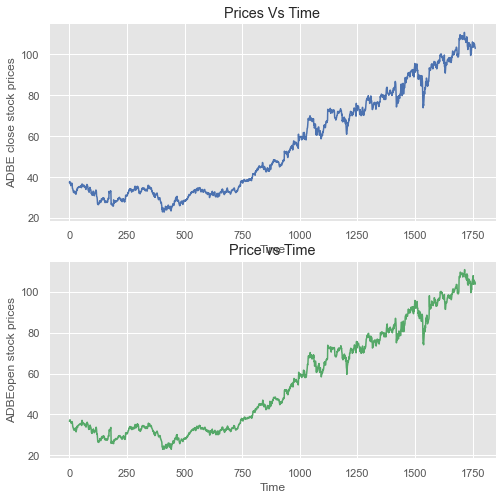

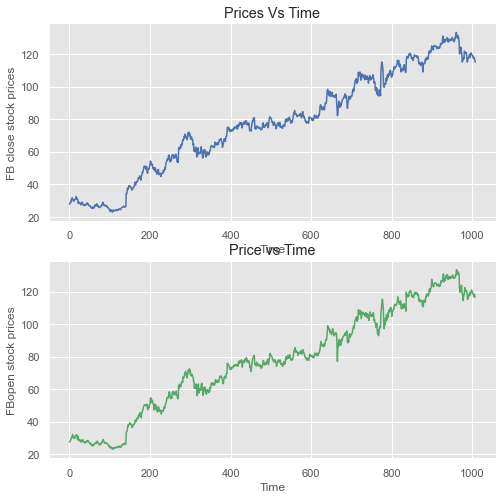

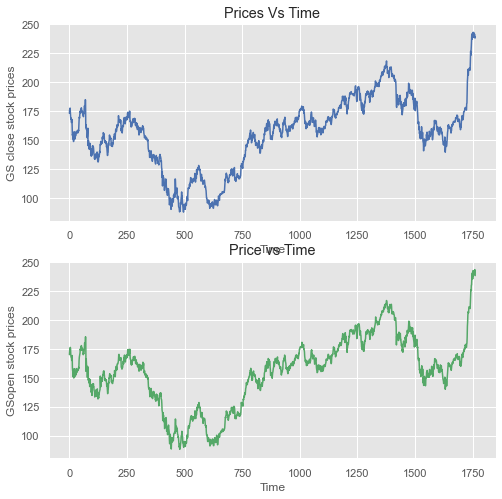

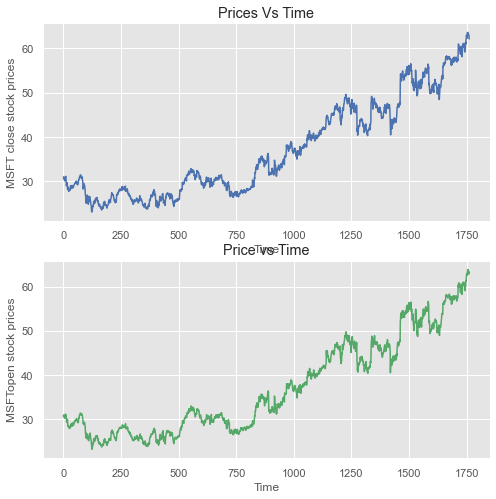

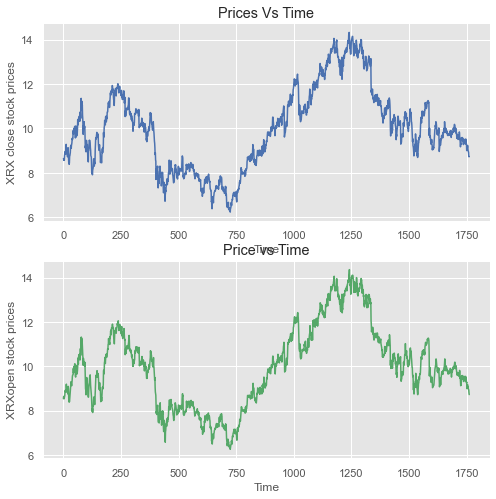

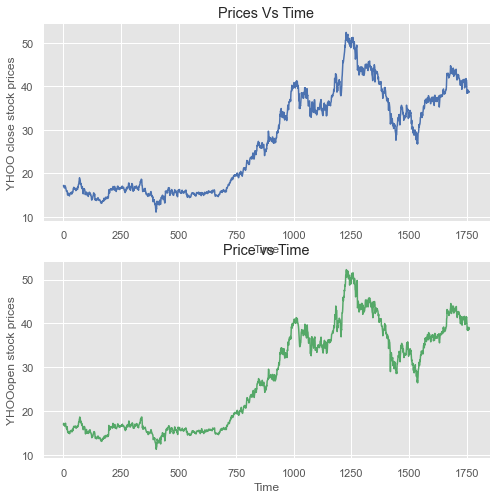

In [30]:
def plotter(code):
    global closing_stock
    global opening_stock
    f, axs = plt.subplots(2,2,figsize=(8,8))
    plt.subplot(212)
    company = df[df['symbol']==code]
    company = company.open.values.astype('float32')
    company = company.reshape(-1,1)
    opening_stock = company
    plt.grid(True)
    plt.xlabel('Time')
    plt.ylabel(code + 'open stock prices')
    plt.title('Price vs Time')
    plt.plot(company, 'g')
    
    plt.subplot(211)
    company_close = df[df['symbol']==code]
    company_close = company_close.close.values.astype('float32')
    company_close = company_close.reshape(-1, 1)
    closing_stock = company_close
    plt.xlabel('Time')
    plt.ylabel(code + " close stock prices")
    plt.title('Prices Vs Time')
    plt.grid(True)
    plt.plot(company_close , 'b')
    plt.show()
for i in comp_plot:
    plotter(i)

In [31]:
stocks = closing_stock[: , 0]
print(stocks)
stocks = stocks.reshape(len(stocks) , 1)

[17.1  17.23 17.17 ... 38.73 38.64 38.67]


In [32]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0,1))
stocks = scaler.fit_transform(stocks)

In [33]:
train = int(len(stocks) *0.8)
test = len(stocks) - train

In [34]:
print(train, test)

1409 353


In [35]:
train = stocks[0:train]
print(train)

[[0.14559111]
 [0.14874032]
 [0.14728683]
 ...
 [0.63372093]
 [0.6145833 ]
 [0.6196705 ]]


In [36]:
test = stocks[len(train):]

In [37]:
train = train.reshape(len(train), 1)
test = test.reshape(len(test), 1)

In [38]:
print(train.shape)
print(test.shape)

(1409, 1)
(353, 1)


In [39]:
def process_data(data, n_features):
    dataX, dataY = [], []
    for i in range(len(data)-n_features):
        a = data[i:(i+n_features), 0]
        dataX.append(a)
        dataY.append(data[i+n_features, 0])
    return np.array(dataX), np.array(dataY)

In [40]:
n_features=2
trainX, trainY = process_data(train, n_features)
testX, testY = process_data(test, n_features)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
print(trainX.shape, trainY.shape, testX.shape, testY.shape)

(1407, 2) (1407,) (351, 2) (351,)


In [42]:
trainX = trainX.reshape(trainX.shape[0],1, trainX.shape[1])
testX = testX.reshape(testX.shape[0],1, testX.shape[1])

In [43]:
from sklearn.metrics import mean_squared_error
from keras.optimizers import Adam , SGD , RMSprop

In [44]:
filepath = 'stock_weights.hdf5'
from keras.callbacks import ReduceLROnPlateau, ModelCheckpoint
lr_reduce = ReduceLROnPlateau(monitor='val_loss', factor=0.1, epsilon=0.0001, patience=1, verbose=1)
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1, save_best_only=True, mode='max')

In [45]:
from keras.layers import GRU,BatchNormalization
model = Sequential()
model.add(GRU(256, input_shape=(1, n_features), return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64, activation='relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 1, 256)            198912    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1, 256)            0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 740,737
Trainable params: 740,737
Non-trainable params: 0
________________________________________________

In [46]:
model.compile(loss='mean_squared_error', optimizer=Adam(lr = 0.0005), metrics=['mean_squared_error'])

In [47]:
history = model.fit(trainX, trainY, epochs=100, batch_size=128, callbacks=[checkpoint, lr_reduce], validation_data=(testX, testY))

Train on 1407 samples, validate on 351 samples
Epoch 1/100
1407/1407 [==============================] - 1s 855us/step - loss: 0.1453 - mean_squared_error: 0.1453 - val_loss: 0.1725 - val_mean_squared_error: 0.1725

Epoch 00001: val_loss improved from -inf to 0.17249, saving model to stock_weights.hdf5
Epoch 2/100
1407/1407 [==============================] - 0s 198us/step - loss: 0.0411 - mean_squared_error: 0.0411 - val_loss: 0.0018 - val_mean_squared_error: 0.0018

Epoch 00002: val_loss did not improve from 0.17249
Epoch 3/100
1407/1407 [==============================] - 0s 236us/step - loss: 0.0183 - mean_squared_error: 0.0183 - val_loss: 0.0011 - val_mean_squared_error: 0.0011

Epoch 00003: val_loss did not improve from 0.17249
Epoch 4/100
1407/1407 [==============================] - 0s 211us/step - loss: 0.0083 - mean_squared_error: 0.0083 - val_loss: 0.0103 - val_mean_squared_error: 0.0103

Epoch 00004: val_loss did not improve from 0.17249

Epoch 00004: ReduceLROnPlateau reducing

1407/1407 [==============================] - 0s 211us/step - loss: 0.0062 - mean_squared_error: 0.0062 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00029: val_loss did not improve from 0.17249

Epoch 00029: ReduceLROnPlateau reducing learning rate to 5.0000006177084924e-30.
Epoch 30/100
1407/1407 [==============================] - 0s 206us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00030: val_loss did not improve from 0.17249

Epoch 00030: ReduceLROnPlateau reducing learning rate to 5.0000007681717695e-31.
Epoch 31/100
1407/1407 [==============================] - 0s 214us/step - loss: 0.0065 - mean_squared_error: 0.0065 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00031: val_loss did not improve from 0.17249

Epoch 00031: ReduceLROnPlateau reducing learning rate to 5.000000956250865e-32.
Epoch 32/100
1407/1407 [==============================] - 0s 223us/step - loss: 0.0064 - mean_squared_error:

1407/1407 [==============================] - 0s 244us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00060: val_loss did not improve from 0.17249
Epoch 61/100
1407/1407 [==============================] - 0s 250us/step - loss: 0.0063 - mean_squared_error: 0.0063 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00061: val_loss did not improve from 0.17249
Epoch 62/100
1407/1407 [==============================] - 0s 250us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00062: val_loss did not improve from 0.17249
Epoch 63/100
1407/1407 [==============================] - 0s 240us/step - loss: 0.0067 - mean_squared_error: 0.0067 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00063: val_loss did not improve from 0.17249
Epoch 64/100
1407/1407 [==============================] - 0s 298us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.007

1407/1407 [==============================] - 0s 273us/step - loss: 0.0068 - mean_squared_error: 0.0068 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00097: val_loss did not improve from 0.17249
Epoch 98/100
1407/1407 [==============================] - 0s 249us/step - loss: 0.0066 - mean_squared_error: 0.0066 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00098: val_loss did not improve from 0.17249
Epoch 99/100
1407/1407 [==============================] - 0s 262us/step - loss: 0.0069 - mean_squared_error: 0.0069 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00099: val_loss did not improve from 0.17249
Epoch 100/100
1407/1407 [==============================] - 0s 270us/step - loss: 0.0064 - mean_squared_error: 0.0064 - val_loss: 0.0075 - val_mean_squared_error: 0.0075

Epoch 00100: val_loss did not improve from 0.17249


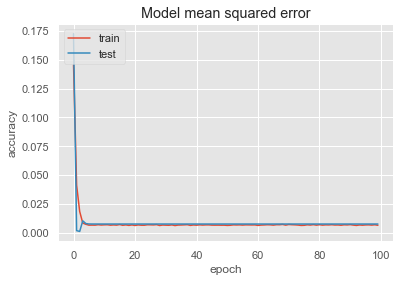

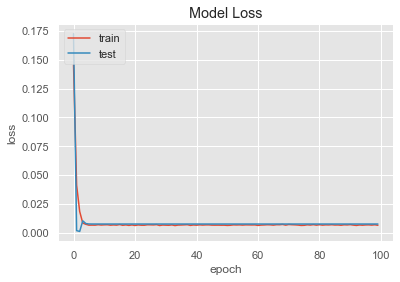

In [48]:
plt.plot(history.history['mean_squared_error'])
plt.plot(history.history['val_mean_squared_error'])
plt.title('Model mean squared error')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend(['train','test'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [49]:
def model_score(model, X_train, y_train, X_test, y_test):
    trainScore = model.evaluate(X_train, y_train, verbose=0)
    print('Train Score: %.5f MSE (%.2f RMSE)' % (trainScore[0], math.sqrt(trainScore[0])))
    testScore = model.evaluate(X_test, y_test, verbose=0)
    print('Test Score: %.5f MSE (%.2f RMSE)' % (testScore[0], math.sqrt(testScore[0])))
    return trainScore[0], testScore[0]
model_score(model, trainX, trainY, testX, testY)

Train Score: 0.00561 MSE (0.07 RMSE)
Test Score: 0.00750 MSE (0.09 RMSE)


(0.005608348895060249, 0.007504450910833486)

In [50]:
pred = model.predict(testX)
pred = scaler.inverse_transform(pred)
pred[:10]

array([[33.116135],
       [32.09951 ],
       [32.151356],
       [32.77749 ],
       [32.82815 ],
       [32.61233 ],
       [32.2664  ],
       [31.650213],
       [30.799866],
       [29.744051]], dtype=float32)

In [51]:
testY = testY.reshape(testY.shape[0], 1)
testY = scaler.inverse_transform(testY)
testY[:10]

array([[34.49    ],
       [35.93    ],
       [36.24    ],
       [36.1     ],
       [35.69    ],
       [35.19    ],
       [34.1     ],
       [32.93    ],
       [31.31    ],
       [31.739998]], dtype=float32)

Red means predicted and Blue means actual prices


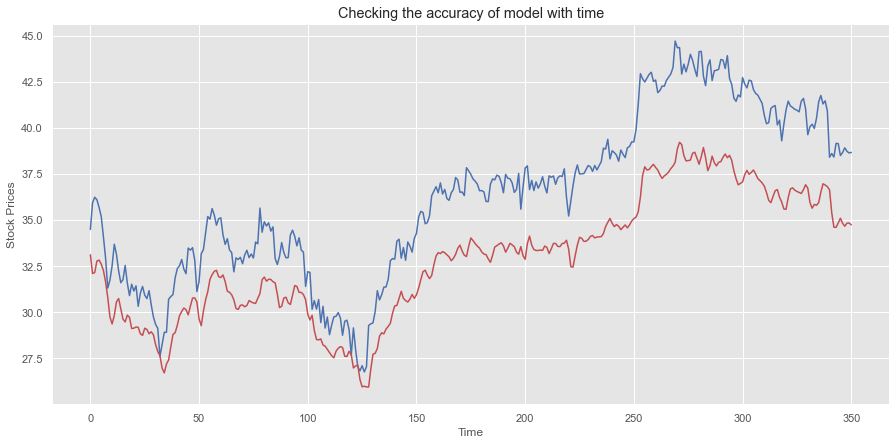

In [52]:
print('Red means predicted and Blue means actual prices')
plt.rcParams['figure.figsize'] = (15,7)
plt.plot(testY, 'b')
plt.plot(pred, 'r')
plt.xlabel('Time')
plt.ylabel('Stock Prices')
plt.title('Checking the accuracy of model with time')
plt.grid(True)
plt.show()